In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('default')

import seaborn as sns
import plotly
import plotly.express as px

churn_data = pd.read_csv('data/churn.csv')

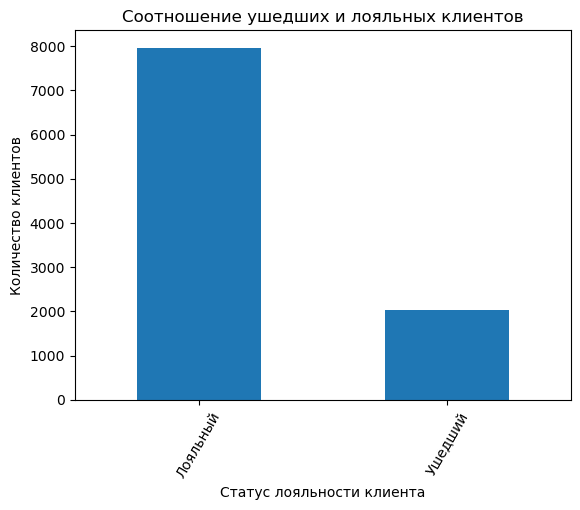

Лояльный    7963
Ушедший     2037
Name: Лояльность, dtype: int64


In [2]:
# Задание 9.1
"""" Каково соотношение ушедших и лояльных клиентов? 
Покажите это на графике и дайте комментарий по соотношению."""

churn_data['Лояльность'] = churn_data['Exited'].apply(lambda x: 'Лояльный' if x == 0 else 'Ушедший')
loyal_data=churn_data['Лояльность'].value_counts()

loyal_data.plot(kind='bar')
plt.xlabel('Статус лояльности клиента')
plt.xticks(rotation=60)

plt.ylabel('Количество клиентов')
plt.title('Соотношение ушедших и лояльных клиентов')
plt.show()
print (loyal_data)






Так как нужно рассмотреть соотношение двух категорий, лучше всего воспользоваться столбчатой диаграммой. Из данного графика можно сделать вывод, что количество лояльных клиентов почти в 4 раза превышает количество ушедших.

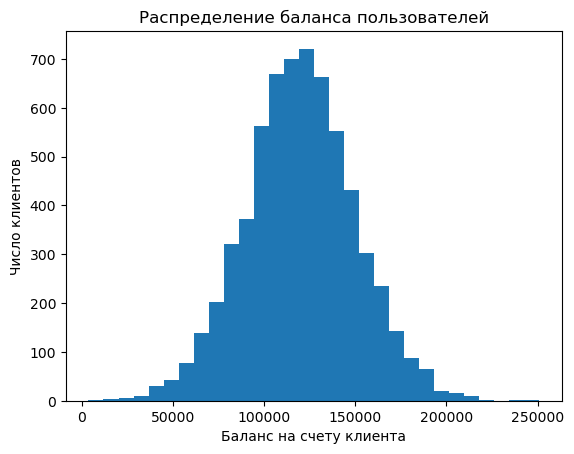

In [3]:
# Задание 9.2
""" Постройте график, показывающий распределение баланса пользователей, у которых 
на счету больше 2 500 долларов. Опишите распределение и сделайте выводы."""

rich_client_data = churn_data[churn_data['Balance'] > 2500]

plt.hist(rich_client_data['Balance'], bins=30)
plt.xlabel('Баланс на счету клиента')
plt.ylabel('Число клиентов')
plt.title('Распределение баланса пользователей')
plt.show()

Для визуализации распределение наилучшим образом подойдет гистограмма. Полученное распределении является нормальным распределением, выбросов не наблюдается(но можно заметить группу клиентов, баланс которых значительно больше, чем у основной массы). Можно сделать вывод, что у наибольшего числа клиентов из выборки баланс находится в диапазоне 100000-150000. Также есть маленькая группа клиентоа, баланс которых составляет до 250000.

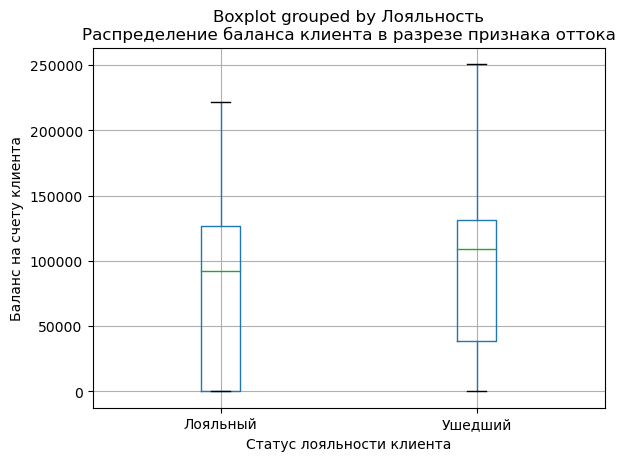

In [4]:
# Задание 9.3
""" Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы 
на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, 
что может не устраивать ушедших клиентов в банке."""

churn_data.boxplot(column='Balance', by='Лояльность')
plt.xlabel('Статус лояльности клиента')
plt.ylabel('Баланс на счету клиента')
plt.title('Распределение баланса клиента в разрезе признака оттока')
plt.show()


Так как требуется показать распределение в разрезе, воспользуемся коробчатой диаграммой. По полученной диаграмме можно увидеть, что среди лояльных клиентов больше пользователей, хранящих в банке меньшие суммы (медианное значение - меньше 100000), а среди ушедших больше пользователей с более крупными вкладами (медианное значение больше 100000). Можно сделать вывод, что в банке недостаточно программ для хранения больших сумм или условия этих программ неудобны для пользователей.

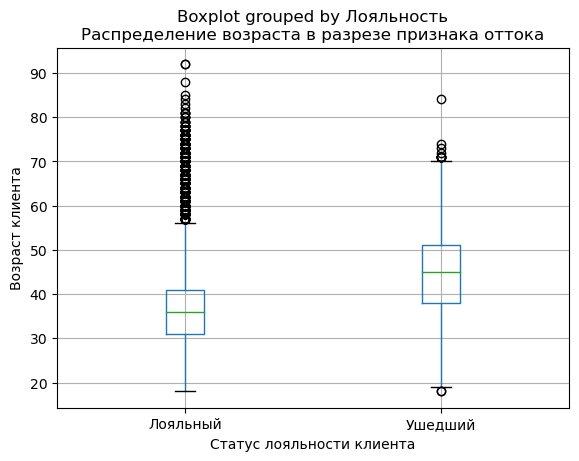

In [5]:
# Задание 9.4
""" Посмотрите на распределение возраста в разрезе признака оттока. 
В какой группе больше потенциальных выбросов? 
На какую возрастную категорию клиентов стоит обратить внимание банку?"""

churn_data.boxplot(column='Age', by='Лояльность')
plt.xlabel('Статус лояльности клиента')
plt.ylabel('Возраст клиента')
plt.title('Распределение возраста в разрезе признака оттока')
plt.show()

Снова воспользуемся коробчатой диаграммой. Из полученной диаграммы видно, что средний возраст лояльного клиента банка - примерно 35 лет. также среди лояльных клиентов наблюдается большее количество выбросов. Среди же ушедших клиентов больше всего людей от 40 до 50 лет, т.е. группа предпенсионного возраста, которая вероятнее располагает большими, чем у возрастной категории 30-40 лет, накоплениями. Следственно, банку стоит обратить особое внимание на эту группу людей. А т.к. наибольшее количество выбросов среди лояльных клиентов приходится на людей в возрасте от 55 до 90 лет, значит лояльных клиентов зрелого и пожилого возраста у банка совсем немного, поэтому стоит поразмыслить над привлечением и удержанием этой категории пользователей.

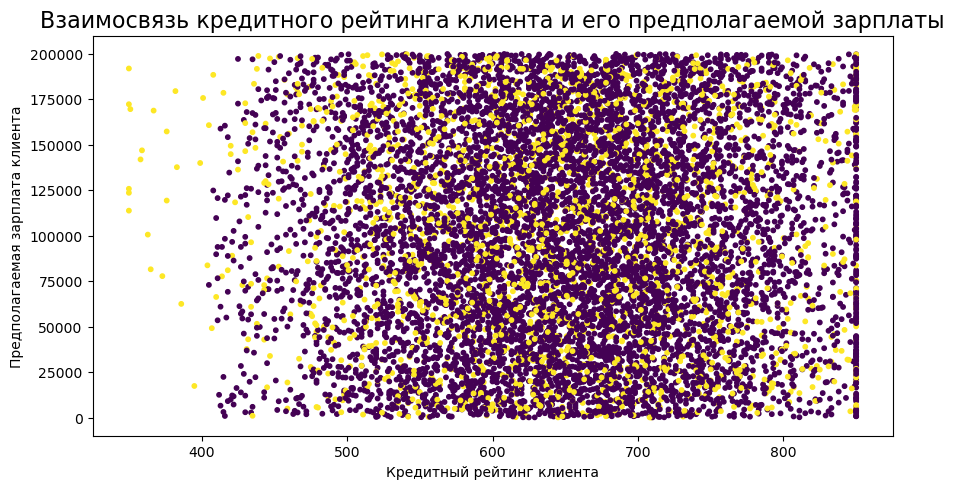

In [6]:
# Задание 9.5
""" Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 
Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? 
Если не видите явной взаимосвязи, укажите это."""

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])

axes.scatter(
    x=churn_data['CreditScore'], 
    y=churn_data['EstimatedSalary'], 
    c = churn_data['Exited'],
    
    s=10,
    marker='o',
    
);

axes.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты', fontsize=16)
axes.set_xlabel('Кредитный рейтинг клиента')
axes.set_ylabel('Предполагаемая зарплата клиента');



Така как требуется показать взаимосвязь двух числовых признаков, лучше всего использовать диаграмму рассеяния. Цвет точки на данном графике соответствует статусу лояльности клиента (желтый- ушедшие, фиолетовый - лояльные). Можно сделать вывод, что явной взаимосвязи между кредитным рейтингом и предполагаемой зарплатой не наблюдается.

In [7]:
# Задание 9.6
""" Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это."""

grouped_by_gender = churn_data.groupby(['Gender'])['Exited'].mean()

fig = px.bar(
    data_frame=grouped_by_gender,
    x=grouped_by_gender.index,
    y='Exited',
    height=500,
    width=700,
    title='Среднее значение лояльности клиента (доля ушедших клиентов)'
)

fig.show()


Так как перед нами стоит задача сравнения, логично использовать столбчатую диаграмму. Чтобы ее построить, сравним средние значения статусов клиентов одного пола (используем столбец 'Exited' из DataFrame, который хранит флаг статуса клиента, т.е. флаг в нуле, когда клиент лоялен, и переводится в единицу, когда клиент уходит). Следовательно, из графика можно сделать вывод, что чеще уходят женщины (Female).

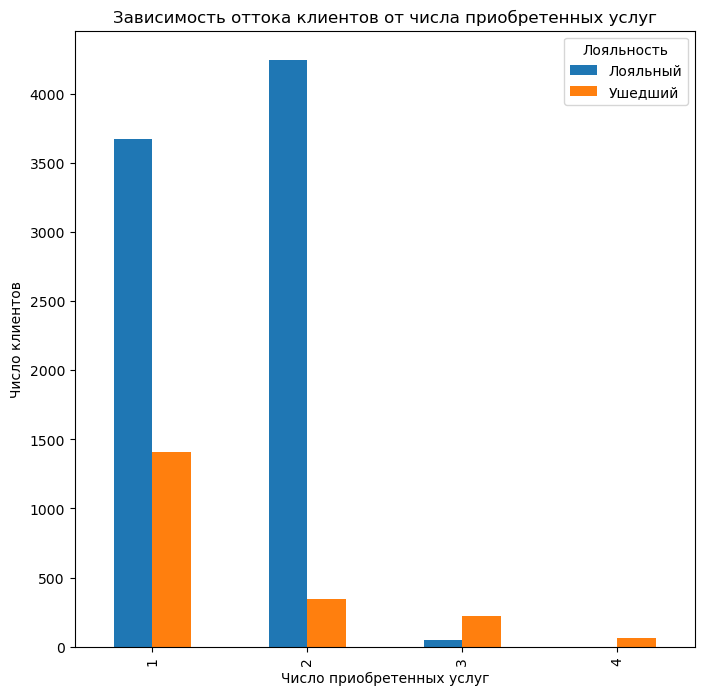

In [8]:
# Задание 9.7
"""Как отток клиентов зависит от числа приобретённых у банка услуг? 
Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму."""

loyalty_pivot = churn_data.pivot_table(
    'CustomerId',
    index='NumOfProducts',
    columns='Лояльность',
    aggfunc='count'
)
loyalty_pivot = loyalty_pivot.fillna(0) # если есть пропуски, заменить их на нули

fig, axes = plt.subplots(figsize=(8, 8))
loyalty_pivot.plot(kind='bar', ax=axes)
axes.set_title('Зависимость оттока клиентов от числа приобретенных услуг')
axes.set_xlabel('Число приобретенных услуг')
axes.set_ylabel('Число клиентов');

Из диаграммы видно, что наименьший отток клиентов происходит при приобретении двух услуг банка (число лояльных клиентов этой группы примерно в 10 раз превышает число ушедших). При приобретении одной услуги соотношение тоже неплохое: лояльных клиентов больше ушедших в два раза. А вот при  приобретении трех и четырех услуг лояльность клиентов резко падает, но, если сравнивать с общим количеством клиентов, эта группа невелика (меньше 500).

In [9]:
# Задание 9.8
"""Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. 
Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?"""

churn_data['Активность'] = churn_data['IsActiveMember'].apply(lambda x: 'Активный' if x == 1 else 'Неактивный')

activity_pivot = churn_data.pivot_table(
    'CustomerId',
    index='Активность',
    columns='Лояльность',
    aggfunc='count'
)
fig = px.bar(
    data_frame=activity_pivot,
    width=800,
    height=500,
    color='Лояльность',
    barmode='group',
    title='Влияние статуса активного клиента на лояльность пользователя',
)
fig.update_layout(
    xaxis_title='Статус активности клиента',
    yaxis_title='Число клиентов'
)
fig.show()

Из получившейся диаграммы можно сделать вывод, что среди активных пользователей больше лояльных клиентов, а также они реже уходят из банка.

In [10]:
# Задание 9.9
"""В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение 
на карте мира. Предположите, с чем это может быть связано."""

geo_pivot = churn_data.pivot_table( values='Exited', index='Geography', aggfunc= 'mean', ) 
fig = px.choropleth(
    data_frame= geo_pivot, 
    locations=geo_pivot.index, 
    locationmode = "country names", 
    color= 'Exited', 
    range_color=[0, 0.35], 
    title='Доля ушедших клиентов в странах', 
    width=800,
    height=500,
    color_continuous_scale='Reds'
)
fig.show()

Из тепловой картограммы видно, что доля ушедших клиентов более велика в трех развитых странах Европы: Испании, Франции и особенно Германии. Возможно, банк перестал соответствовать обновленным финансовым законам Евросоюза, или же он попал под санкции в этих странах.

In [11]:
# Задание 9.10
"""Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), 
а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках 
сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте 
категории клиентов, которые уходят чаще всего."""

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
    
churn_data['CreditScoreCat']=churn_data['CreditScore'].apply(get_credit_score_cat)

score_pivot = round(pd.pivot_table(
    churn_data,
    index = 'CreditScoreCat',
    columns = 'Tenure',
    values = 'Exited',
    aggfunc = 'mean' 
), 2);
fig = px.imshow(score_pivot, text_auto = True, title = 'Тепловая карта распределения среднего значения оттока клиентов')
fig.show()


Из полученной тепловой карты можнот сделать вывод, что чаще всего уходят клиенты с очень низким кредитным рейтингом и пользующиеся услугами банка меньше года. Также в целомб независимо от времени пользования услугами, у банка есть риск потерять клиента с очень низким рейтингом (однако в этом предположении стоит подробнее разобрать результаты для клиентов, пользующихся услугами банка 2 года и 5 лет, т.к., судя по карте, доля ушедших клиентов этой категории весьма мала).